Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Importing dataset

In [2]:
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# EDA

In [5]:
# To display all columns 
pd.set_option('display.max_columns', None)

In [7]:
# information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
df.shape

(4177, 9)

In [11]:
# Drop any nan values if any
df.dropna(inplace = True)

In [14]:
# To check any null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

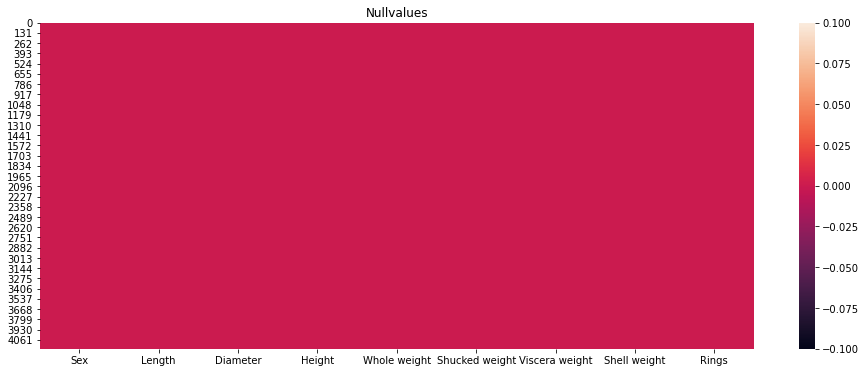

In [16]:
# showing the null values using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

In [17]:
#describing the descriptive statastics of numerical values
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


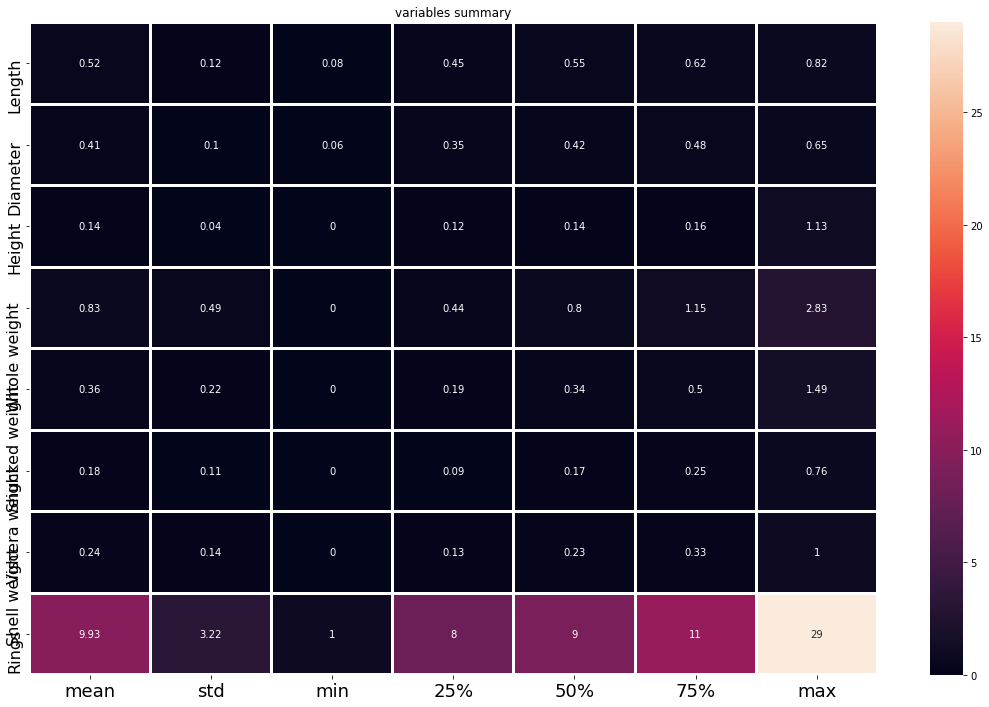

In [18]:
plt.figure(figsize = (19, 12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot = True,fmt="g")
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("variables summary")
plt.show()

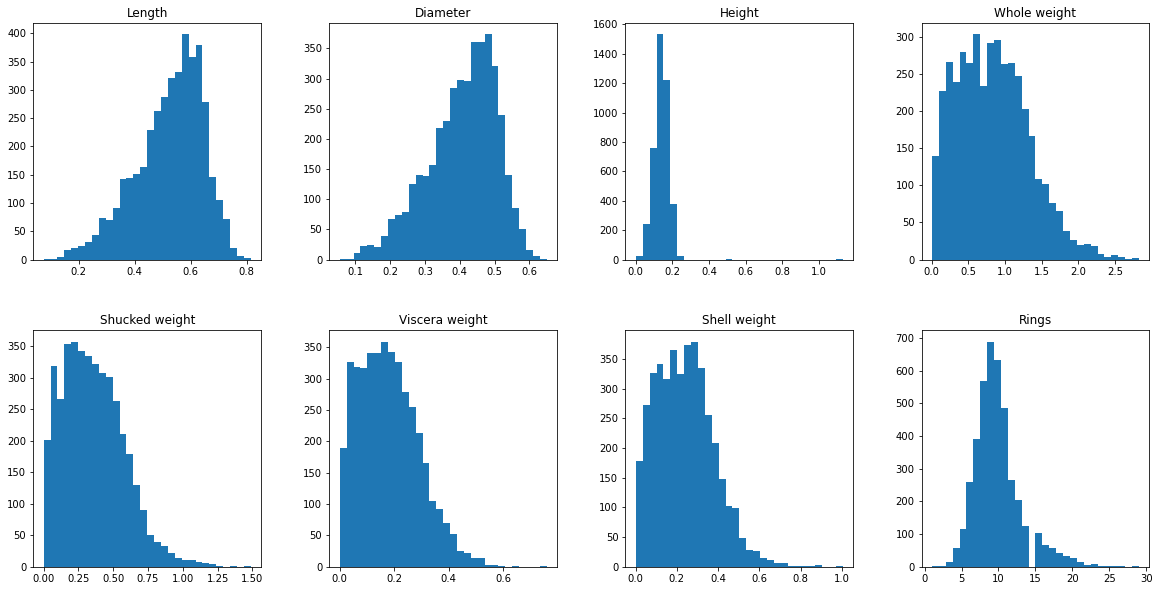

In [19]:
df.hist(figsize = (20, 10), grid = False, layout =(2, 4), bins = 30)
plt.show()

By observing graph they are not normally distributed 

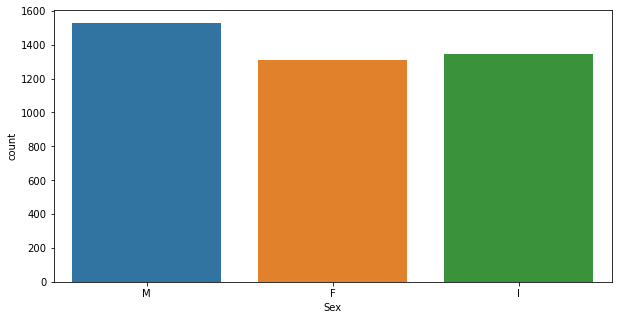

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'])
plt.show()

The males have highest number followed by infants with very close margin

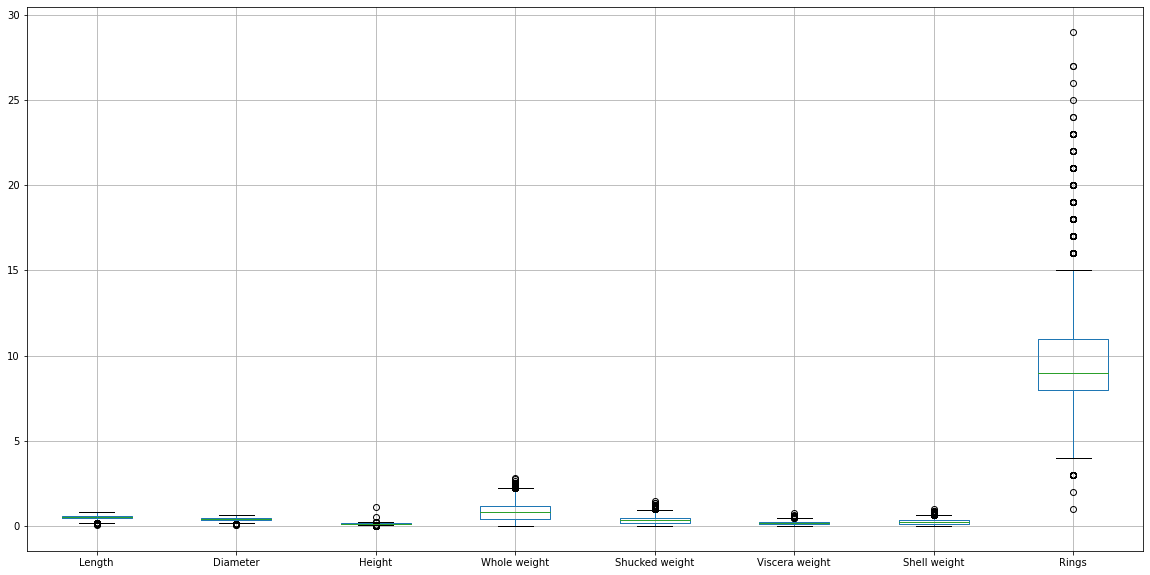

In [22]:
df.boxplot(figsize=(20,10))
plt.show()

The  target feature rings has a lot of outliers, so does some other features. This is the reason probable why these features are not normally distributed.

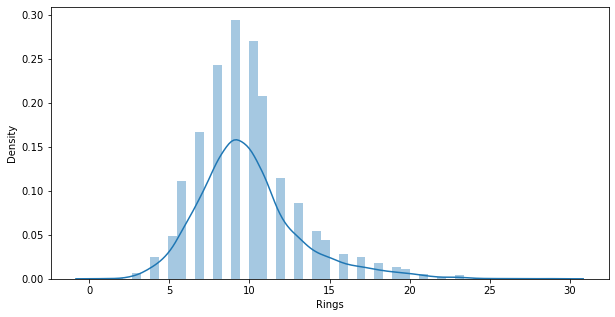

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(df['Rings'])
plt.show()

Right skewed as predicted

Bivariate Analysis

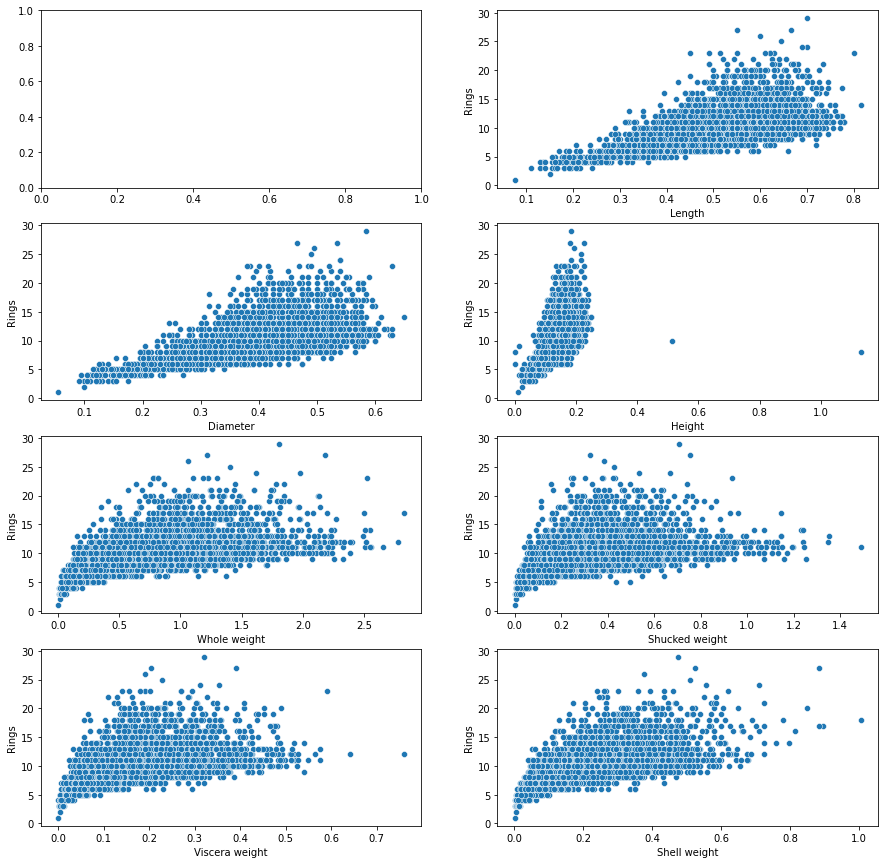

In [26]:
fig, axes = plt.subplots(4, 2, figsize = (15, 15))
axes = axes.flatten()

for i in range(1, len(df.columns)-1):
    sns.scatterplot(x=df.iloc[:,i], y=df['Rings'], ax=axes[i])

plt.show()

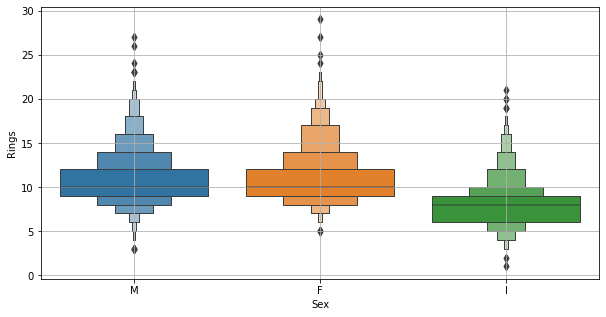

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,11.129304,3.104256,5.0,9.0,10.0,12.0,29.0
I,1342.0,7.890462,2.511554,1.0,6.0,8.0,9.0,21.0
M,1528.0,10.705497,3.026349,3.0,9.0,10.0,12.0,27.0


In [27]:
plt.figure(figsize=(10,5))
sns.boxenplot(y=df['Rings'], x=df['Sex'])
plt.grid()
plt.show()

df.groupby('Sex')['Rings'].describe()

MultiVariate Analysis

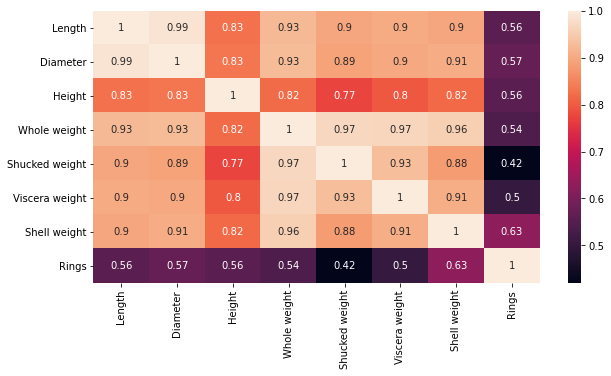

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
1.Whole Weight is almost corelated  with all other features except rings

2.Height has least correlated with remaining features

3.Rings is most linearly corelated with Shell Weight followed by Diameter,height and length

4.Rings is least correlated with Shucked Weight

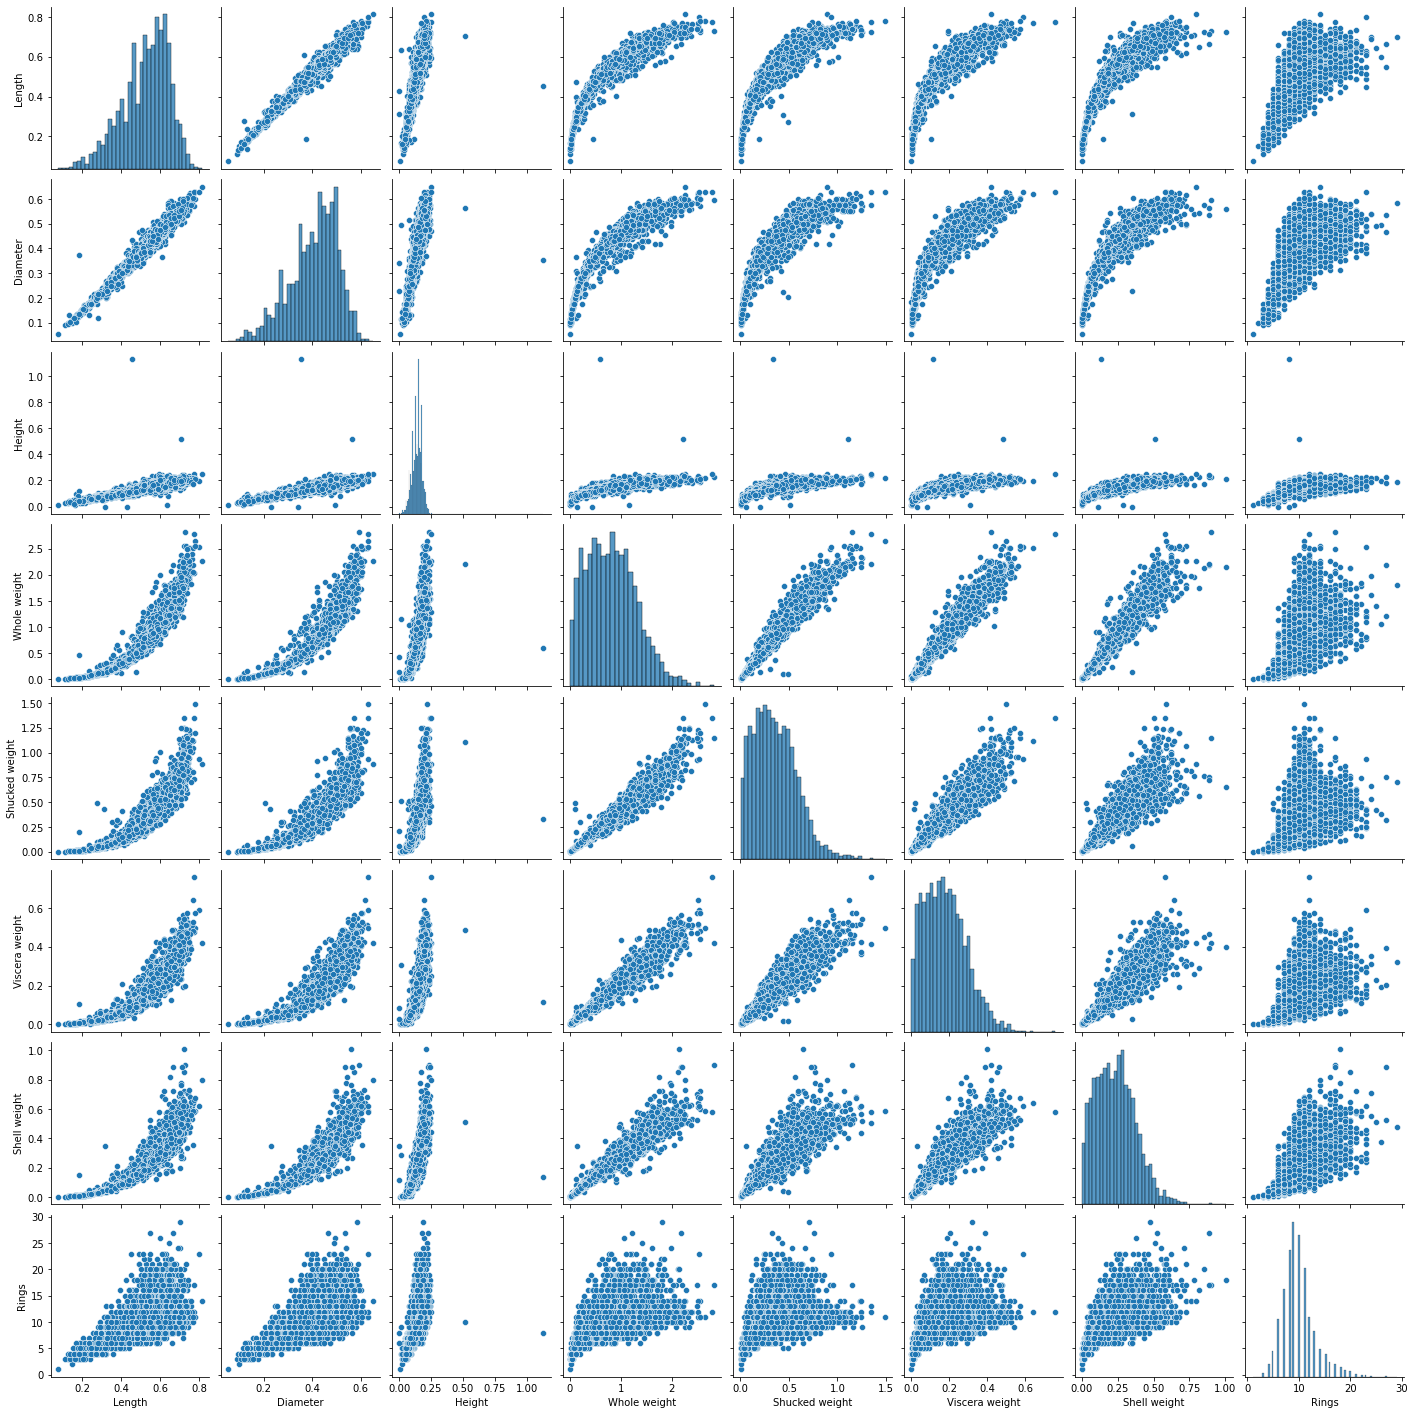

In [29]:
sns.pairplot(df)
plt.show()

### Handling Categorical features

In [34]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


## Feature Selection


In [39]:
df.shape

(4177, 10)

In [40]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')

In [41]:
x = df.drop(['Rings'], axis = 1)
y = df['Rings']

In [42]:
# checking the skewness of the data
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

### Removing the skewness with powertransform

In [44]:
# importing power transform
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new,columns=x.columns)

In [45]:
df_new.skew()

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

In [71]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [72]:
x_scaled

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.63821689,
        -0.68801788,  1.31667716],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.21298732,
        -0.68801788,  1.31667716],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.20713907,
        -0.68801788, -0.75948762],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.49695471,
        -0.68801788,  1.31667716],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.41073914,
        -0.68801788, -0.75948762],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.84048058,
        -0.68801788,  1.31667716]])

##### Multicollinearity

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,40.945763,Length
1,42.379841,Diameter
2,3.581369,Height
3,109.768710,Whole weight
4,28.550546,Shucked weight
5,17.445012,Viscera weight
6,21.263272,Shell weight
7,1.983709,Sex_I
8,1.398273,Sex_M


### 'Diameter','Whole weight','Viscera weight' are having high vif so we have to drop these columns

In [84]:
X3 = x.drop(['Diameter','Whole weight','Viscera weight'], axis = 1)

In [85]:
x_scaled2 = scaler.fit_transform(X3)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled2,i)for i in range(x_scaled2.shape[1])]
vif["features"]=X3.columns
vif

,vif,features
0,7.836960,Length
1,3.524719,Height
2,6.154361,Shucked weight
3,6.665183,Shell weight
4,1.928554,Sex_I
5,1.392962,Sex_M


In [87]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_scaled2, y)

ExtraTreesRegressor()

In [88]:
print(selection.feature_importances_)

[0.17075472 0.13573975 0.20189399 0.35495709 0.11162705 0.02502739]


In [93]:
#splitting the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled2,y,test_size=0.25,random_state=340)
y_train.head()

1166     9
2904     9
74      13
1804    10
680      7
Name: Rings, dtype: int64

## Linear Regression model training

In [94]:
# model instantiating and training
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [95]:
#adjuasted r*2
regression.score(x_train,y_train)


0.5235083357849393

In [96]:
regression.score(x_test,y_test)

0.49708522409119715

In [97]:
y_pred = regression.predict(x_test)
y_pred

array([ 7.30069334, 14.6795879 ,  8.58262049, ..., 15.30567888,
       10.52430958,  9.66125003])

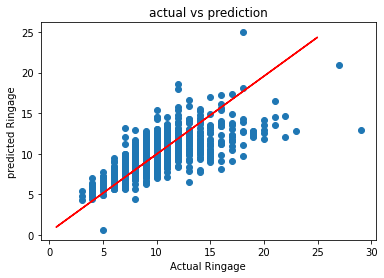

In [98]:
plt.scatter(y_test,y_pred)
m, c = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, (m * y_pred + c), color = 'r')
plt.xlabel('Actual Ringage')
plt.ylabel('predicted Ringage')
plt.title('actual vs prediction')
plt.show()

In [99]:
# model evaluation techniques
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [100]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.5669092884587028
MSE: 4.873102218912817
RMSE: 2.2075104119602282


In [101]:
#Regularization with lasso
from sklearn.linear_model import LassoCV,Lasso

In [103]:
lasscv = LassoCV(alphas = None,max_iter=1000, normalize=True)

In [104]:
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [105]:
#learning rate
alpha = lasscv.alpha_
alpha

3.673499893684547e-05

In [106]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.673499893684547e-05)

In [107]:
linearlasso=lasso_reg.score(x_test,y_test)

In [108]:
linearlasso*100

49.708993468265895

#### Random forest regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [110]:
y_pred = rf.predict(x_test)

In [111]:
rf.score(x_train, y_train)

0.9318430460885541

In [112]:
y_pred = rf.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred)*100)

R square score 93.1843046088554


In [113]:
y_test_pred = rf.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 48.976603840469714


#### Adaboost Model training

In [114]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train,y_train)


AdaBoostRegressor()

In [115]:
y_pred = ada.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred))

R square score 0.36699188599111776


In [116]:
y_test_pred = ada.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 28.775088594090093


#### Gradient boosting regressor

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)


GradientBoostingRegressor()

In [118]:
y_pred = gbr.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred))

R square score 0.6442683581799373


In [119]:
y_test_pred = gbr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 52.84721571469253


#### xgb model

In [120]:
from xgboost import XGBRegressor
#import xgboost as xgb
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
y_pred = xgb.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred)*100)

R square score 91.48614499638069


In [122]:
y_test_pred = xgb.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 48.229622015530374


## cross validation

In [123]:
from sklearn.model_selection import cross_val_score

In [125]:
scr=cross_val_score(regression,x,y,cv=5)
print("cross validation for linear regression is",scr.mean()*100)

cross validation for linear regression is 41.86023342895326


In [126]:
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation for random forest regressor is",scr.mean()*100)

cross validation for random forest regressor is 44.5017409733542


In [127]:
scr=cross_val_score(xgb,x,y,cv=10)
print("cross validation for xgboost regressor is",scr.mean()*100)

cross validation for xgboost regressor is 33.22770449769356


In [128]:
scr=cross_val_score(ada,x,y,cv=5)
print("cross validation for Ada boost regressor is",scr.mean()*100)

cross validation for Ada boost regressor is -27.24025352521745


In [130]:
scr=cross_val_score(gbr,x,y,cv=5)
print("cross validation for Gradient boost regressor is",scr.mean()*100)

cross validation for Gradient boost regressor is 46.39104388655263


By observing crossvalidation scores with different models Randomforest model shows least difference


## Hyperparameter tuning using Randomizedsearch

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [133]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [134]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [135]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [136]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [137]:
rfr=  RandomForestRegressor(n_estimators=300,min_samples_split=15,min_samples_leaf=1,max_features='sqrt',
 max_depth=15)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
print('*********accuracy post tuning********')
print(metrics.r2_score(y_test,y_pred)*100)

*********accuracy post tuning********
53.24143508121616


## saving the model


In [138]:
import joblib
joblib.dump(rf,'Abalone.pkl')

['Abalone.pkl']